In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


from pycaret.classification import *
# s = setup(data, target = 'Class variable', session_id = 123)

In [4]:
data = pd.read_csv('weather_classification_data.csv')
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [5]:
s = setup(data, target = 'Weather Type', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Weather Type
2,Target type,Multiclass
3,Target mapping,"Cloudy: 0, Rainy: 1, Snowy: 2, Sunny: 3"
4,Original data shape,"(13200, 11)"
5,Transformed data shape,"(13200, 19)"
6,Transformed train set shape,"(9240, 19)"
7,Transformed test set shape,"(3960, 19)"
8,Numeric features,7
9,Categorical features,3


In [6]:
# functional API
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9132,0.9933,0.9132,0.9139,0.9133,0.8843,0.8844,0.7090
gbc,Gradient Boosting Classifier,0.9128,0.0000,0.9128,0.9132,0.9128,0.8837,0.8838,3.1810
lightgbm,Light Gradient Boosting Machine,0.9107,0.9932,0.9107,0.9113,0.9108,0.8810,0.8811,1.3780
et,Extra Trees Classifier,0.9060,0.9909,0.9060,0.9077,0.9063,0.8746,0.8749,0.5320
dt,Decision Tree Classifier,0.9025,0.9350,0.9025,0.9029,0.9025,0.8700,0.8701,0.1310
knn,K Neighbors Classifier,0.8874,0.9732,0.8874,0.8890,0.8877,0.8499,0.8503,0.3290
ada,Ada Boost Classifier,0.8631,0.0000,0.8631,0.8682,0.8639,0.8175,0.8186,0.4310
lr,Logistic Regression,0.8453,0.0000,0.8453,0.8468,0.8453,0.7938,0.7942,4.0940
lda,Linear Discriminant Analysis,0.8253,0.0000,0.8253,0.8431,0.8262,0.7671,0.7715,0.1220
ridge,Ridge Classifier,0.7961,0.0000,0.7961,0.8104,0.7956,0.7281,0.7321,0.1230


In [7]:
print(best)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [8]:
# functional API
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

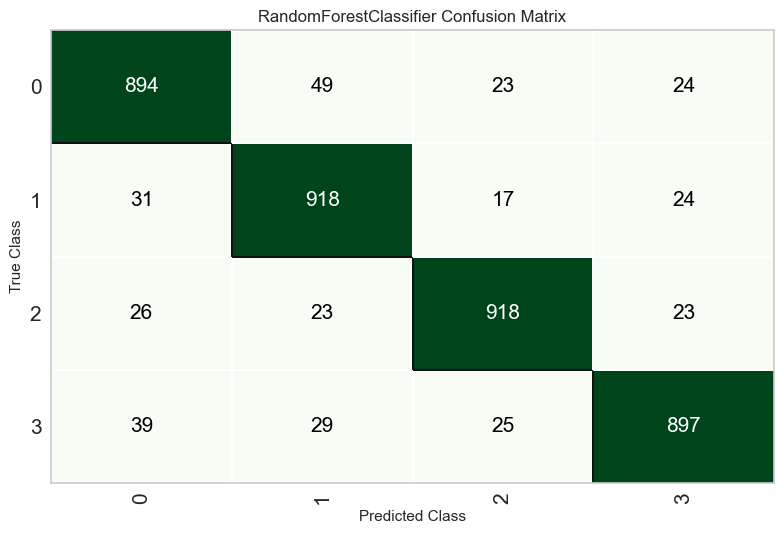

In [9]:
# functional API
plot_model(best, plot = 'confusion_matrix')

In [10]:
# functional API
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9159,0.9938,0.9159,0.9161,0.9159,0.8879,0.8879


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,prediction_label,prediction_score
9829,24.0,98,7.5,77.0,overcast,994.450012,3,Spring,3.5,coastal,Rainy,Rainy,1.00
3649,23.0,84,13.0,77.0,overcast,996.739990,0,Winter,3.0,mountain,Rainy,Rainy,0.95
2293,20.0,77,14.5,75.0,partly cloudy,1012.250000,3,Spring,4.5,mountain,Rainy,Rainy,1.00
6714,19.0,62,1.0,42.0,overcast,1001.330017,1,Spring,8.0,coastal,Cloudy,Cloudy,1.00
3607,25.0,68,12.5,76.0,overcast,996.260010,1,Spring,4.0,coastal,Rainy,Rainy,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952,30.0,74,28.0,86.0,partly cloudy,1012.809998,9,Summer,2.0,mountain,Cloudy,Rainy,0.66
1443,29.0,37,4.0,6.0,partly cloudy,1015.280029,10,Spring,7.0,coastal,Sunny,Sunny,1.00
1977,-2.0,97,13.0,95.0,overcast,999.590027,0,Winter,4.5,inland,Snowy,Snowy,1.00
4239,-3.0,65,6.0,52.0,overcast,992.200012,0,Winter,3.0,mountain,Snowy,Snowy,1.00


In [11]:
# functional API
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Temperature', 'Humidity',
                                              'Wind Speed', 'Precipitation (%)',
                                              'Atmospheric Pressure', 'UV Index',
                                              'Visibility (km)'],
                                     transformer=SimpleImputer(add_indi...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
                                         max_leaf_nodes=None, max_samples=N

In [12]:
# functional API
loaded_model = load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\nickyh\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Temperature', 'Humidity',
                                             'Wind Speed', 'Precipitation (%)',
                                             'Atmospheric Pressure', 'UV Index',
                                             'Visibility...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=